# Comprehensive EDA with Nice Graphs
<a id="start"></a>
Welcome to this comprehensive exploratory data analysis (EDA) and visualization of the Titanic dataset. My goal is to uncover insights into the factors that contributed to the survival of certain passengers aboard the ill-fated RMS Titanic. I'll leverage statistical techniques and nice visualizations to understand the underlying patterns within the data.

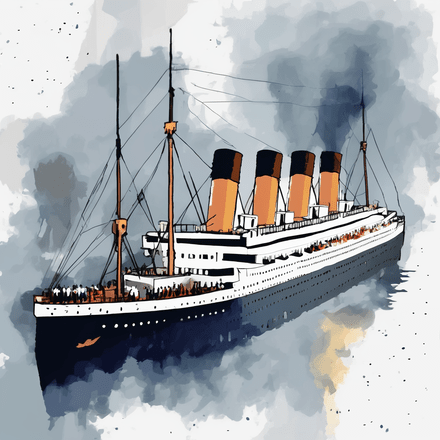

| Attribute | Details |
|-----------|---------|
| **Author** | **`Muhammad Bilal Khan`** |
| **Kaggle** | [![Kaggle Badge](https://img.shields.io/badge/Kaggle-035a7d?style=for-the-badge&logo=kaggle&logoColor=white)](https://www.kaggle.com/devbilalkhan) |
| **Twitter** | [![Twitter Badge](https://img.shields.io/badge/Twitter-%23000000.svg?style=for-the-badge&logo=Twitter&logoColor=white)](https://twitter.com/devbilalkhan) |
| **GitHub** | [![GitHub Badge](https://img.shields.io/badge/github-%23121011.svg?style=for-the-badge&logo=github&logoColor=white)](https://github.com/devbilalkhan) |
| **Email** | [![Outlook Badge](https://img.shields.io/badge/Microsoft_Outlook-0078D4?style=for-the-badge&logo=microsoft-outlook&logoColor=white)](mailto:bilal.khan@live.com) |

## Dataset Overview

The Titanic dataset is a classic and very famous dataset used for machine learning and data analysis. It contains information about the passengers, formatted into two sets: training and test data. The training set includes passenger information along with the survival outcome, which we'll use to train our machine learning models. The test set contains passenger information but without the survival outcome, and it's used to test the performance of our trained models.

Here are the key columns in the dataset along with a brief description of each:

- `Survived`: Indicates if a passenger survived (1) or not (0).
- `Pclass`: Ticket class, a proxy for socio-economic status (1 = 1st, 2 = 2nd, 3 = 3rd).
- `Name`: Passenger's name.
- `Sex`: Passenger's sex.
- `Age`: Passenger's age in years.
- `SibSp`: Number of siblings/spouses aboard the Titanic.
- `Parch`: Number of parents/children aboard the Titanic.
- `Ticket`: Ticket number.
- `Fare`: Passenger fare.
- `Cabin`: Cabin number.
- `Embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

## Project Goal

My primary objective is to analyze the Titanic dataset to understand which factors were most influential in predicting the survival of passengers. I aim to answer questions such as "Did women and children have higher survival rates?" and "How did the passenger class affect the survival chances?" By the end of this notebook, we will have a detailed visual and quantitative understanding of the Titanic's passenger data.

## Acknowledgements

I would like to acknowledge the creators of the Titanic dataset for making it publicly available and a special thanks to the Kaggle platform for hosting the Titanic Machine Learning competition. 

I would like to extend my gratitude to [Gabriel Preda](https://www.kaggle.com/gpreda) for his invaluable contributions to the analysis of the Titanic dataset. Gabriel's notebook has been a guiding resource, demonstrating the power of thoughtful data analysis.

[Navigate to Conclusion ➡️](#conclusion)

# 1. Abstract
This notebook presents a detailed exploratory data analysis of the Titanic dataset, which includes both training and test datasets. The training dataset is composed of 891 entries and 12 attributes, including both numerical and categorical columns. The statistical summary highlights key observations about survival rates, passenger classes, and fares, as well as correlations between different variables. The analysis also identifies missing data within the dataset and its potential impact on the study. A particular focus is given to the titles of passengers and their corresponding survival rates, revealing social distinctions that played a role in survival outcomes.

In [78]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_utils import inspect_frequent_values, inspect_missing_values, inspect_unique_values, display_custom_palette
import warnings
warnings.filterwarnings('ignore')


# 2. What Secrets Lie Within Our Data?

In [79]:
train_ds = pd.read_csv('data/train.csv')
test_ds = pd.read_csv('data/test.csv')

# Insights from Passenger Names

First I am going to merge the two datasets together to  to observe overall patterns and statistics.

In [80]:
df = pd.concat([train_ds, test_ds], axis=0, sort=False)

In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In the next step, I am goint to extract any meaningful information from the names of the passengers. I am going to split names into their titles, given names, last names and maiden names if any. 

In [113]:
df['title'] = df["Name"].apply(lambda name: name.split(',')[1].split('.')[0].strip())
df['maidan_name'] = df["Name"].apply(lambda name: name.replace("\"", "").split('(')[1].split(')')[0] if '(' in name and ')' in name else None)
df['given_name'] = df["Name"].apply(lambda name: name.split('.')[1].strip().split("(")[0].strip() if '(' in name else name.split('.')[1].strip())
df['last_name'] = df["Name"].apply(lambda name: name.split(',')[0])

In [129]:
df[['title', 'given_name', 'last_name', 'maidan_name','Name', 'Ticket', 'Survived']].sort_values(by='Ticket').head(30)

,title,given_name,last_name,maidan_name,Name,Ticket,Survived
504,Miss,Roberta,Maioni,None,"Maioni, Miss. Roberta",110152,1.0
257,Miss,Gladys,Cherry,None,"Cherry, Miss. Gladys",110152,1.0
759,the Countess,of,Rothes,Lucy Noel Martha Dyer-Edwards,"Rothes, the Countess. of (Lucy Noel Martha Dye...",110152,1.0
585,Miss,Ruth,Taussig,None,"Taussig, Miss. Ruth",110413,1.0
262,Mr,Emil,Taussig,None,"Taussig, Mr. Emil",110413,0.0
558,Mrs,Emil,Taussig,Tillie Mandelbaum,"Taussig, Mrs. Emil (Tillie Mandelbaum)",110413,1.0
110,Mr,Walter Chamberlain,Porter,None,"Porter, Mr. Walter Chamberlain",110465,0.0
475,Mr,George Quincy,Clifford,None,"Clifford, Mr. George Quincy",110465,0.0
335,Mr,John Edward,Maguire,None,"Maguire, Mr. John Edward",110469,NaN
158,Mr,John James,Borebank,None,"Borebank, Mr. John James",110489,NaN


## Titanic Passenger Information
Observing the the above sample data, its looks like some passengers share ticket numbers which indicates that they may be travelling together, possibly as family members or as part of a group.

### Ticket 110152

- **Passengers:**
  - Miss Roberta Maioni
  - Miss Gladys Cherry
  - The Countess of Rothes (Lucy Noel Martha Dyer-Edwards)

- **Observations:**
  - All three passengers are women with the titles "Miss" or "The Countess."
  - They survived the sinking of the Titanic.
  - The Countess of Rothes is historically recognized for her role during the disaster.

### Ticket 110413

- **Passengers:**
  - Miss Ruth Taussig
  - Mr. Emil Taussig
  - Mrs. Emil Taussig (Tillie Mandelbaum)

- **Observations:**
  - This group likely represents a family unit.
  - Mrs. Taussig and Ruth survived, while Mr. Taussig did not.

### Ticket 110465

- **Passengers:**
  - Mr. Walter Chamberlain Porter
  - Mr. George Quincy Clifford

- **Observations:**
  - Both men shared the same ticket, suggesting a non-familial relationship, possibly friends or colleagues.
  - Neither man survived the sinking.

### Ticket 110813

- **Passengers:**
  - Mrs. Frank Manley Warren (Anna Sophia Atkinson)
  - Mr. Frank Manley Warren

- **Observations:**
  - Likely a married couple.
  - Mrs. Warren survived, Mr. Warren's survival status is unknown (NaN).

### Ticket 111361

- **Passengers:**
  - Miss Jean Gertrude Hippach
  - Mrs. Louis Albert Hippach (Ida Sophia Fischer)

- **Observations:**
  - Likely a mother and daughter traveling together.
  - Both survived the disaster.

In [150]:
df.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

# 11-Member Family on the Titanic

In [131]:
# find ticket number that has the most value count
ticket_counts = df['Ticket'].value_counts()
ticket_counts

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: count, Length: 929, dtype: int64

The most value count ticket number is **`CA. 2343`**

In [132]:
df[df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,last_name,maidan_name,title,given_name
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,None,Master,Thomas Henry
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,None,Miss,Constance Gladys
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,None,Mr,Frederick
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,None,Mr,George John Jr
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,None,Miss,Stella Anna
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,None,Mr,Douglas Bullen
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,None,Miss,"Dorothy Edith ""Dolly"""
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,None,Miss,Ada
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,Sage,None,Mr,John George
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,Sage,None,Master,William Henry


It seems like a large family with 11-member family were travelling. The family consisting of two parents and nine children, with five boys and four girls, experienced a tragedy, with only two potentially surviving. The ages of the children are mostly unknown, except for one 14.5-year-old boy. Three of the boys were considered adults, as indicated by the title "Mr." Of the family, it is confirmed that 9 out of the 11 members did not survive.

Custom Color Palette Display:


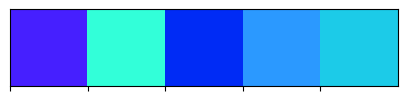

In [27]:
#palette_colors = ["#FF40D1", "#19D4FF", "#ACF626", "#049DD9", "#F27B35"]
palette_colors = ["#461FFF", "#32FFD9", "#002BF5", "#2B99FF", "#1CCBE8"]
display_custom_palette(palette_colors)

In [50]:
def plot_countplot(df, column, first_title, hue="Source"):    
  
  
    f, ax1 = plt.subplots(1, 1, figsize=(15, 10))
    total_axes = 1
    
    sns.countplot(y=column, data=df, hue="Survived", palette=palette_colors, ax=ax1)
    ax1.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", alpha=0.5)
    ax1.set_title(f"Total Passengers / {first_title}")
    
    # legend should be on the lowe right
    plt.legend(loc='lower right')
   
    
    plt.show()  

In [141]:

from wordcloud import WordCloud

def generate_wordcloud(df, column, title):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          stopwords = None,
                          min_font_size = 10).generate(' '.join(df[column].dropna().values))

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title, size=20)
    plt.tight_layout(pad = 0)
    plt.show()

In [152]:
df.title.value_counts()

title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

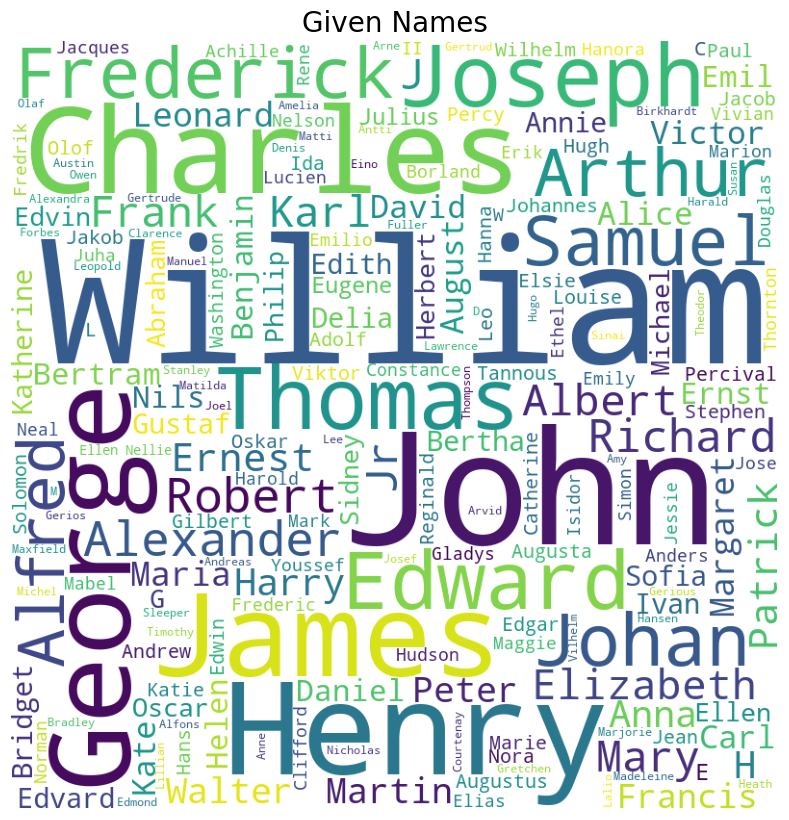

In [142]:
generate_wordcloud(df, 'given_name', "Given Names")

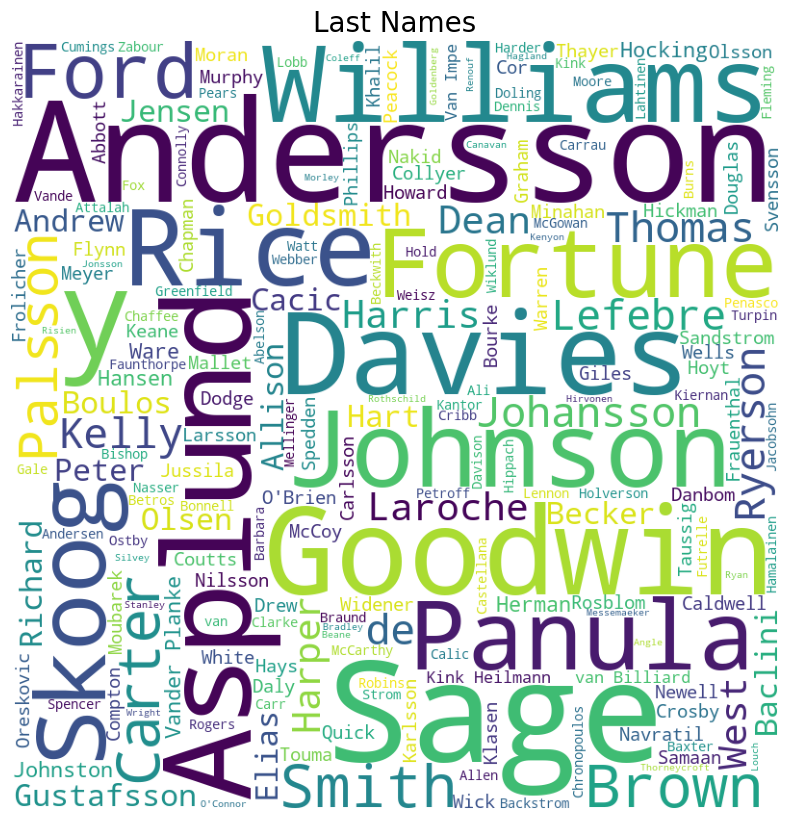

In [143]:
generate_wordcloud(df, 'last_name', "Last Names")

In [ ]:
generate_wordcloud(df, 'maidan_name')

# 5. Conclusion
<a id="conclusion"></a>
Throughout this notebook, I have conducted an in-depth analysis of the Titanic dataset, uncovering insights into the catastrophe that unfolded over a century ago. My findings suggest that survival on the Titanic was not random, but rather significantly influenced by socio-economic factors such as passenger class and fare, in addition to demographic factors like age, sex, and family relationships.

Key takeaways include:
- Higher survival rates for women and children, as indicated by the titles 'Master', 'Miss', and 'Mrs'.
- A discernible negative correlation between passenger class and survival, with first-class passengers more likely to survive.
- The challenge of missing data in significant columns like 'Age' and 'Cabin', which I addressed to the best of my ability.

This analysis highlights the impact of social status and demographics on survival chances during maritime disasters. Looking ahead, I aim to focus on more accurately imputing missing values and perhaps enriching this dataset with additional external data to refine my predictions and deepen my insights.
